In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 



## Data Understanding

In [2]:
df=pd.read_csv(r"C://Users//aayushi solanki//Downloads\archive (3).zip")

In [3]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
df.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [5]:
df.sample(5)

,Unnamed: 0,label,text,label_num
1751,4575,spam,Subject: meds doing cheap hop\r\nso act like y...,1
1865,2740,ham,Subject: meter 1558\r\ndaren - meter 1558 has ...,0
4706,2993,ham,Subject: air products - plant down for 4 days ...,0
2808,3619,ham,Subject: guadalupe power - aep corporate guara...,0
1272,4409,spam,Subject: \r\ndo you want a cheap rolex watch ?...,1


In [6]:
df.shape

(5171, 4)

In [7]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [8]:
df.dtypes

Unnamed: 0     int64
label         object
text          object
label_num      int64
dtype: object

In [9]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [10]:
df.nunique()

Unnamed: 0    5171
label            2
text          4993
label_num        2
dtype: int64

In [11]:
df['Unnamed: 0'].unique()

array([ 605, 2349, 3624, ..., 2933, 1409, 4807], dtype=int64)

In [12]:
df['label_num'].unique()

array([0, 1], dtype=int64)

## Data Pre Processing

In [13]:
#checking for null values

df.isnull().sum().any()


False

In [14]:
#checking the duplicate value

df.duplicated().sum()

0

In [15]:
#information of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [16]:
#5 point statistical summary

df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


# Droping  unnecessary columns



In [17]:
df.drop("Unnamed: 0", axis=1, inplace=True)


In [18]:
df.drop('label_num', axis=1, inplace=True)

In [19]:
df.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [20]:
#encode ham and spam with 0 and 1.

from sklearn.preprocessing import LabelEncoder

#create an object of it
encoder = LabelEncoder()

In [21]:
df['label'] = encoder.fit_transform(df['label'])

In [22]:
df.head()

,label,text
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...


In [23]:
df.duplicated().sum()

178

In [24]:
df.drop_duplicates(keep='first')

,label,text
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5165,0,"Subject: fw : crosstex energy , driscoll ranch..."
5166,0,Subject: put the 10 on the ft\r\nthe transport...
5167,0,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5169,0,Subject: industrial worksheets for august 2000...


In [25]:
df.shape

(5171, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

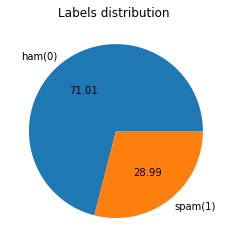

In [26]:
#pie chart for labels 

plt.pie((df['label']).value_counts(), labels=['ham(0)','spam(1)'], autopct='%0.2f')
plt.title('Labels distribution ')
plt.show

In [27]:
#let's see text or email content column

df['text'].head()

0    Subject: enron methanol ; meter # : 988291\r\n...
1    Subject: hpl nom for january 9 , 2001\r\n( see...
2    Subject: neon retreat\r\nho ho ho , we ' re ar...
3    Subject: photoshop , windows , office . cheap ...
4    Subject: re : indian springs\r\nthis deal is t...
Name: text, dtype: object

# further analysis

1. how many alphabets, words and sentences are used in our sms and analyis this
2. no. of character, words, sentences - 3 new columns will be added

In [28]:
import nltk

In [29]:

nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\aayushi
[nltk_data]     solanki\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
#find length of sms and store it in new column called num_char for no. of char 

df['num_char'] = df['text'].apply(len)

In [30]:
df.head()

,label,text,num_char
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524
3,1,"Subject: photoshop , windows , office . cheap ...",414
4,0,Subject: re : indian springs\r\nthis deal is t...,336


In [31]:
#now let's fetch number of words

df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [32]:
df.head()

,label,text,num_char,num_words
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551
3,1,"Subject: photoshop , windows , office . cheap ...",414,49
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71


In [33]:
#now let's get number of sentences

df['num_sen'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [35]:

df.head()

,label,text,num_char,num_words,num_sen
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68,3
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24,3
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551,24
3,1,"Subject: photoshop , windows , office . cheap ...",414,49,3
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71,3


In [34]:
#let's analyze ham and spam simultaneously

#ham 

df[df['label'] == 0][['num_char', 'num_sen', 'num_words']].describe()

,num_char,num_sen,num_words
count,3672.000000,3672.000000,3672.000000
mean,977.008170,11.440904,226.239107
std,1382.827493,24.892442,332.179661
min,18.000000,1.000000,3.000000
25%,231.750000,3.000000,51.000000
50%,530.000000,6.000000,124.000000
75%,1227.250000,13.000000,294.000000
max,32258.000000,1204.000000,8863.000000


In [43]:
#spam

df[df['label'] == 1][['num_char', 'num_sen', 'num_words']].describe()

,num_char,num_sen,num_words
count,1499.000000,1499.000000,1499.000000
mean,1223.256171,16.966644,236.387592
std,1825.986210,29.691205,346.821249
min,11.000000,1.000000,2.000000
25%,283.000000,4.000000,55.000000
50%,576.000000,9.000000,116.000000
75%,1253.500000,18.500000,244.000000
max,22073.000000,577.000000,3963.000000


**observation**: the mean char of of spam is more than ham 
    although the count of ham was greater (imbalanced dataset)

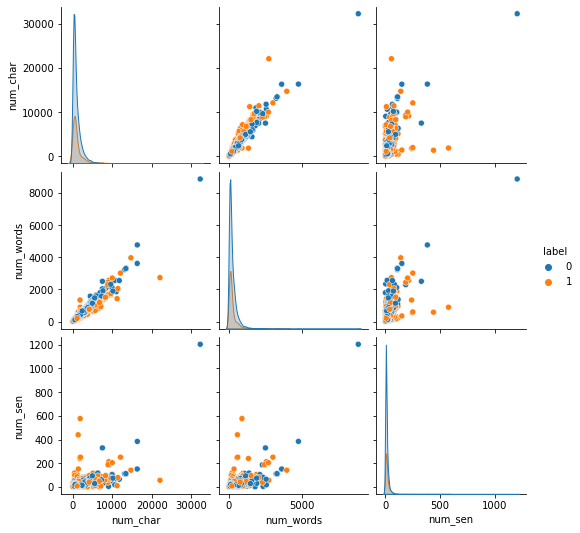

In [44]:
sns.pairplot(df, hue='label')

_**observation**_
data contains outliers and relationship is linear with each other 

<AxesSubplot:>

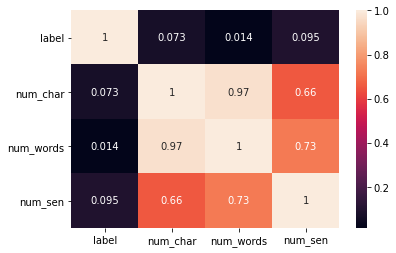

In [45]:
sns.heatmap(df.corr(), annot=True)

**_____________________________________________________**

_-----------------------------

# Text Pre processing

1. convert the text into lower case 
2. Tokenisation
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming 

Natural Language Toolkit (NLTK) library 

for it we will make functions for each task


In [46]:
from nltk.stem.porter import PorterStemmer

#it will make the word in it's root form
ps = PorterStemmer()

#example
ps.stem('dancing')

'danc'

In [47]:
from nltk.corpus import stopwords

In [48]:
import string

In [49]:
#function for text pre processing including lower case, tokenization,
#removing specail characters, Removing stop words and punctuation and Stemming

def transform_text (text):
    text = text.lower()               #lower-case
    text = nltk.word_tokenize(text)   #tokenize
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)                #remove special character     
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ". join(y) 


In [50]:
#example

transform_text('Hi, I am Aayushi! I am an Intern at CodersCave')

'hi aayushi intern coderscav'

In [51]:
#now let's apply this function in to our data

df['transformed_text'] = df['text'].apply(transform_text)

In [52]:
df.head()

,label,text,num_char,num_words,num_sen,transformed_text
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68,3,subject enron methanol meter 988291 follow not...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24,3,subject hpl nom januari 9 2001 see attach file...
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,1,"Subject: photoshop , windows , office . cheap ...",414,49,3,subject photoshop window offic cheap main tren...
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71,3,subject indian spring deal book teco pvr reven...


In [53]:
from wordcloud import WordCloud 

wc = WordCloud(width=500, height=500, min_font_size =10, background_color='white')

In [54]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep = ' '))

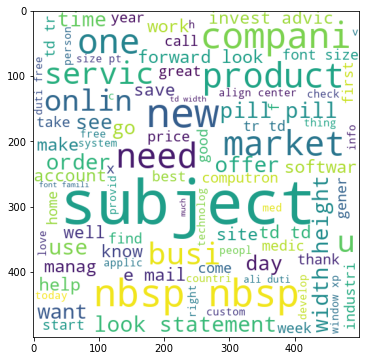

In [52]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [55]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep = ' '))

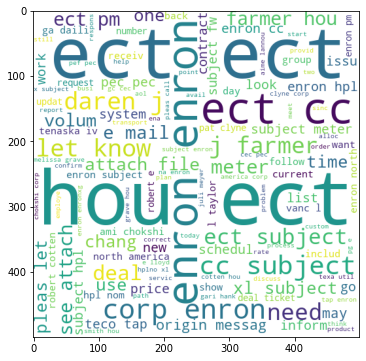

In [56]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

# Top 30 words

1. Ham 
2. Spam


extract transformed text column wit spam label and convert it into list 

In [57]:
spam_corpus = []

for msgs in df[df['label']  == 1]['transformed_text'].tolist():
    for words in msgs.split():
        spam_corpus.append(words)
      

In [58]:
len(spam_corpus)

197452

C:\Users\aayushi solanki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


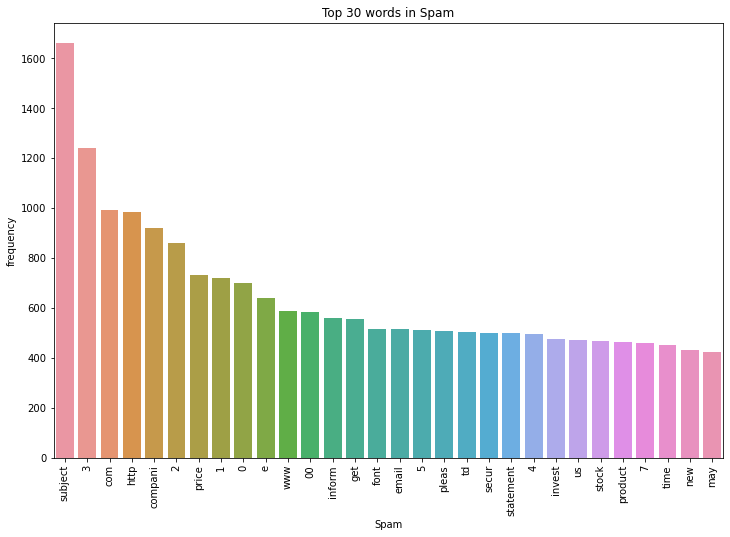

In [59]:
from collections import Counter

plt.figure(figsize=(12,8))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.title('Top 30 words in Spam')
plt.xlabel('Spam')
plt.ylabel('frequency')
plt.show()

In [60]:
ham_corpus = []

for msgs in df[df['label']  == 0]['transformed_text'].tolist():
    for words in msgs.split():
        ham_corpus.append(words)
      

In [61]:
len(ham_corpus)

388650

C:\Users\aayushi solanki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


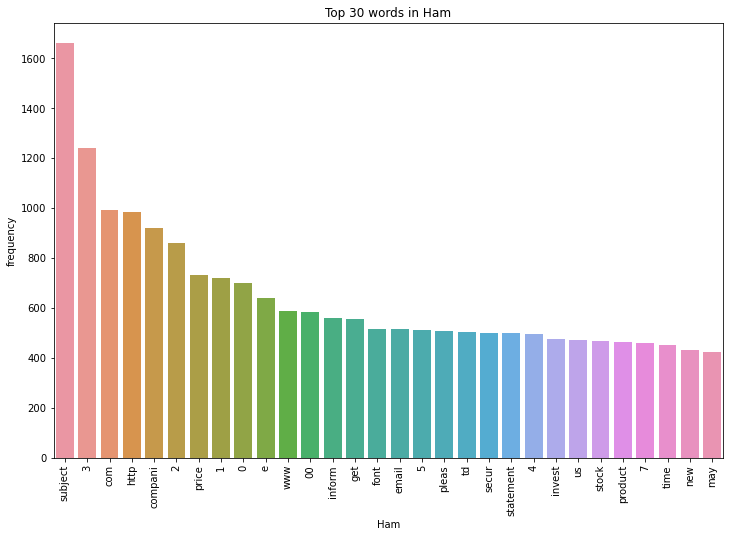

In [62]:
from collections import Counter

plt.figure(figsize=(12,8))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.title('Top 30 words in Ham')
plt.ylabel('frequency')
plt.xlabel('Ham')

plt.show()

# Model Building

### For any text based dataset naive bayes works best but we need numerical inputs for algortihm to work

 1. Input: Text
 2. Target (labels): already in numerics (0 and 1)

######  So we will convert text into numbers/vectors and this process is called vectorization using TF-IDF



In [61]:
#text vectorisation has 3 methods out of which two are

#bag of words - countvector
#tf idf

#we will perform tfidf of this methods of vetcorisation

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

In [87]:
X.shape

(5171,)

In [88]:
X

0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: label, Length: 5171, dtype: int32

In [89]:
y

0       subject enron methanol meter 988291 follow not...
1       subject hpl nom januari 9 2001 see attach file...
2       subject neon retreat ho ho ho around wonder ti...
3       subject photoshop window offic cheap main tren...
4       subject indian spring deal book teco pvr reven...
                              ...                        
5166    subject put 10 ft transport volum decreas 2500...
5167    subject 3 4 2000 follow nom hpl take extra 15 ...
5168    subject calpin daili ga nomin juli mention ear...
5169    subject industri worksheet august 2000 activ a...
5170    subject import onlin bank alert dear valu citi...
Name: transformed_text, Length: 5171, dtype: object

In [90]:
X = df['label']

y = df['transformed_text']

In [91]:
X= tfidf.fit_transform(df['transformed_text']).toarray()

In [92]:
y = df['label'].values


# Train- Test Split Data

In [93]:
from sklearn.model_selection import train_test_split

In [98]:
X.reshape(1,-1)
y.reshape(1,-1)


array([[0, 0, 0, ..., 0, 0, 1]])

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

# Predictive Model testing

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
lr = LogisticRegression()

In [102]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [117]:
#from dataset

Mail = ["Aayushi, this side, I am a Data Science Intern at CodersCave"]
final_data = tfidf.transform(Mail)

final_prediction = lr.predict(final_data)
if (final_prediction[0]==0):
  print("The mail is ham")
else:
  print("The mail is spam")

The mail is spam


In [116]:
#from user

Mail1 = [input("Paste the text of the mail here : ")]  # Taking user input
final_data1 = tfidf.transform(Mail1)

final_prediction1 = lr.predict(final_data1)
print(final_prediction1)

if (final_prediction1[0]==0):
  print("The mail is ham")
else:
  print("The mail is spam")

Paste the text of the mail here : Dear Aayushi Solanki  I am pleased to extend the following offer of Data Analytics Trainee to you on behalf of MedTourEasy. You have been selected for the Data Analytics Trainee position.  Congratulations!  We believe that your knowledge, skills and experience would be an ideal fit for our Analytics Team. We hope you will enjoy your role and make a significant contribution to the overall success of MedTourEasy.  Please take the time to review our offer. You can find it attached as an attachment. It includes important details about your Traineeship and the terms and conditions of your selection.  To “CONFIRM” your enrollment, you NEED to pay the traineeship fees online before 01st July 2023 through the following link https://rzp.io/l/oIs2xNuC
[1]
The mail is spam


In [112]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [104]:
accuracy_score(y_pred, y_test)

0.9845360824742269

In [106]:
confusion_matrix(y_pred, y_test)

array([[1107,    3],
       [  21,  421]], dtype=int64)

In [113]:
precision_score(y_pred, y_test)

0.9929245283018868

In [111]:
f1_score(y_pred, y_test)

0.9722863741339491